## Decision Tree

In [9]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.root = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        # print('begin _build_tree', X.shape, y.shape)
        n_samples, n_features = X.shape
        unique_classes, counts = np.unique(y, return_counts=True)
        # print('unique_classes', unique_classes, 'counts:', counts)

        # Check for stopping conditions
        if depth == self.max_depth or len(unique_classes) == 1:
            # print('bingo stop')
            return unique_classes[np.argmax(counts)]

        # Find the best split
        best_split = None
        best_gini = 1.0

        for feature_idx in range(n_features):
            unique_values = np.unique(X[:, feature_idx])
            # print('unique_values', len(unique_values), unique_values)
            for value in unique_values:
                left_mask = X[:, feature_idx] <= value
                right_mask = X[:, feature_idx] > value

                if len(y[left_mask]) > 0 and len(y[right_mask]) > 0:
                    gini_left = self._gini(y[left_mask])
                    gini_right = self._gini(y[right_mask])
                    weighted_gini = (len(y[left_mask]) / n_samples) * gini_left + (len(y[right_mask]) / n_samples) * gini_right

                    if weighted_gini < best_gini:
                        best_gini = weighted_gini
                        best_split = (feature_idx, value)

        if best_gini == 1.0:
            return unique_classes[np.argmax(counts)]

        feature_idx, value = best_split
        left_mask = X[:, feature_idx] <= value
        right_mask = X[:, feature_idx] > value

        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return (feature_idx, value, left_subtree, right_subtree)

    def _gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1.0 - np.sum(probabilities ** 2)
        return gini

    def predict(self, X):
        predictions = []
        for x in X:
            # print('self.root', self.root)
            x_predict = self._predict(x, self.root)
            predictions.append(x_predict)
        return np.array(predictions)

    def _predict(self, x, node):
        #if isinstance(node, np.int32):
        if isinstance(node, (int, np.integer, float, np.floating)):
            return node
        # print('node', node)
        feature_idx, value, left_subtree, right_subtree = node
        if x[feature_idx] <= value:
            return self._predict(x, left_subtree)
        else:
            return self._predict(x, right_subtree)

In [5]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Matplotlib is building the font cache; this may take a moment.


In [6]:
X.shape, y.shape

((150, 4), (150,))

In [10]:
tree = DecisionTree(max_depth=2)
tree.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, tree.predict(X_train))
test_accuracy = accuracy_score(y_test, tree.predict(X_test))

print(f"Train acuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train acuracy: 0.95
Test accuracy: 0.9666666666666667


## KNN

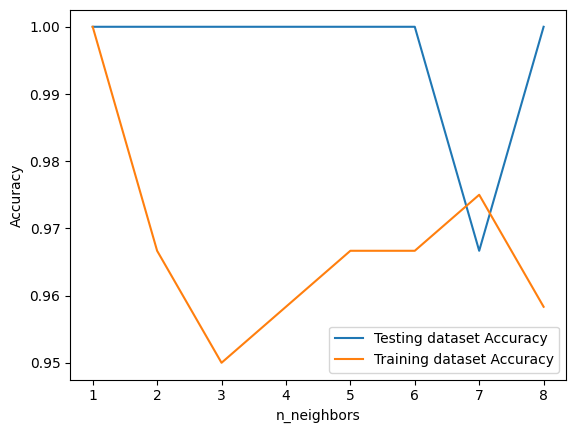

In [11]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import numpy as np 
import matplotlib.pyplot as plt 
  
irisData = load_iris() 
  
# Create feature and target arrays 
X = irisData.data 
y = irisData.target 
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 
  
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 